## 1º Import the libraries.

In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

## 2º Import the MongoCollection.

In [4]:
df = pd.read_csv("../data/message.csv")

## 3º Clean the Database.

In [5]:
df.columns

Index(['_id', 'Name ', 'Message', 'Match'], dtype='object')

In [6]:
df = df.drop(["_id"], axis=1)

In [7]:
df.shape

(35, 3)

In [8]:
df = df[:34]

# Textblob.

## Conversation between Carlos and Pablo.

In [11]:
df[:4]

,Name,Message,Match
0,Pablo,I have read your profile and for some reason I...,Carlos y Pablo
1,Carlos,Anytime...,Carlos y Pablo
2,Pablo,Friday at 8 in the Plaza de Olavide.,Carlos y Pablo
3,Carlos,"Perfect, see you there.",Carlos y Pablo


In [12]:
blob1 = TextBlob(df["Message"][0])
blob1.sentiment

Sentiment(polarity=-0.2, subjectivity=0.7)

In [13]:
blob2 = TextBlob(df["Message"][1])
blob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [14]:
blob3 = TextBlob(df["Message"][2])
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [15]:
blob4 = TextBlob(df["Message"][3])
blob4.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

# Sentiment Intensity Analyzer

In [16]:
#Example:

In [17]:
sia = SentimentIntensityAnalyzer()

In [18]:
sentence1 = df["Message"][0]

In [19]:
polarity = sia.polarity_scores(sentence1)

In [20]:
polarity

{'neg': 0.04, 'neu': 0.873, 'pos': 0.087, 'compound': 0.3182}

In [21]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [22]:
sentimentAnalysis(sentence1)

0.3182

In [23]:
df['sentiment_compound'] = df.Message.apply(sentimentAnalysis)

In [24]:
df.columns

Index(['Name ', 'Message', 'Match', 'sentiment_compound'], dtype='object')

In [25]:
user_sent = df.groupby(["Name "]).sum()
#user_sent

<AxesSubplot:xlabel='Name '>

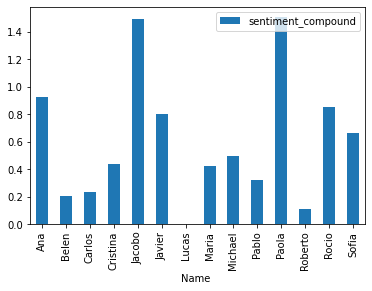

In [26]:
user_sent.plot(kind="bar")

In [30]:
max_user = user_sent.sentiment_compound.max()
max_user

1.5068000000000001

In [39]:
user_sent == max_user

,sentiment_compound
Name,
Ana,False
Belen,False
Carlos,False
Cristina,False
Jacobo,False
Javier,False
Lucas,False
Maria,False
Michael,False
